In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [77]:
L = 1
g=9.81

In [78]:
dt = 0.001
tmax = 20
t = np.arange(0,tmax,dt)

In [79]:
def System(r,t):
    theta,thetap,thetapp = r
    dthetadt= thetap
    thetapp = (((2*g/L)-((thetap**2)*np.cos(theta)))*np.sin(theta))/((1/3)+(np.sin(theta)**2))
    
    return [theta,thetap,thetapp]

In [80]:
def Integrator2(f,r0,t):
    h = t[1] - t[0]
    theta = np.zeros_like(t)
    thetap = np.zeros_like(t)
    thetapp = np.zeros_like(t)
    
    theta[0] = r0[0]
    thetap[0] = r0[1]
    thetapp[0] = r0[2]
    K1 = np.zeros(3)
    K2 = np.zeros(3)
    # Las pendientes instantaneas
    R = np.zeros(3)
    for i in range(1,len(t)):
        R = np.array([theta[i-1],thetap[i-1],thetapp[i-1]])
        K1 = f(R,t[i-1])
        R = np.array([theta[i-1]+h*K1[0],thetap[i-1]+h*K1[1],thetap[i-1]+h*K1[2]])
        K2 = f(R,t[i-1])        
        theta[i] = theta[i-1] + 0.5*h*(K1[0]+K2[0])
        thetap[i] = thetap[i-1] + 0.5*h*(K1[1]+K2[1])
        thetapp[i] = thetapp[i-1] + 0.5*h*(K1[2]+K2[2])
        
    return theta, thetap,thetapp

In [81]:
theta0 = 10*np.pi/180
thetap = 0.
thetapp = 0
r0 = [theta0,thetap,thetapp]

In [82]:
theta, thetap, thetapp = Integrator2(System,r0,t)

In [83]:
x_cm = 0.5*L * np.cos(theta)
y_cm = 0.5*L * np.sin(theta)


tf = []
tiempo = True
while tiempo:
    for i in range(len(x_cm)):
        print(y_cm[i]) 
        if y_cm[i] < 0:
        
            tf.append(t[i])

            tiempo = False
        
        



0.08682408883346517
0.08691007116858959
0.08699613687498074
0.08708228602810461
0.08716851870347894
0.08725483497667325
0.08734123492330872
0.0874277186190583
0.0875142861396466
0.08760093756084988
0.0876876729584961
0.08777449240846476
0.08786139598668706
0.0879483837691457
0.08803545583187501
0.08812261225096084
0.08820985310254055
0.08829717846280301
0.08838458840798857
0.08847208301438904
0.08855966235834763
0.088647326516259
0.08873507556456921
0.08882290957977561
0.08891082863842699
0.0889988328171234
0.08908692219251615
0.08917509684130792
0.08926335684025256
0.08935170226615514
0.08944013319587198
0.08952864970631053
0.08961725187442937
0.08970593977723826
0.089794713491798
0.08988357309522049
0.08997251866466865
0.09006155027735643
0.09015066801054879
0.09023987194156159
0.09032916214776167
0.09041853870656678
0.09050800169544555
0.09059755119191742
0.09068718727355271
0.09077691001797249
0.09086671950284861
0.09095661580590364
0.09104659900491091
0.09113666917769436
0.0912268

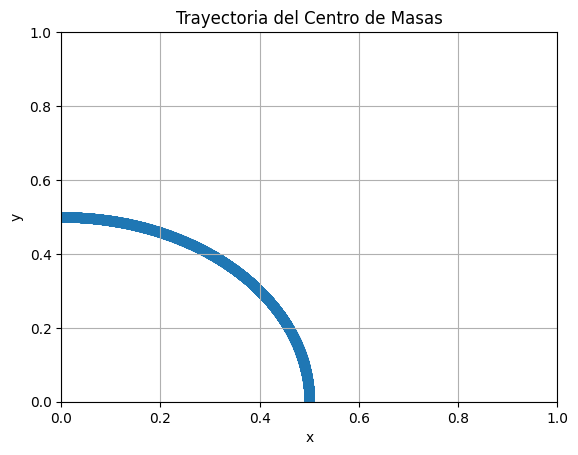

In [84]:
plt.scatter(x_cm, y_cm)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Trayectoria del Centro de Masas')
plt.grid(True)

In [85]:
tf[0]

2.891